# DSCI 100 - Project Final Report - Group 10, Section 003

Github link: https://github.com/beam-9/dsci-100-2025w1-group-003-10

# Introduction #

## Research Context & Background Information ##

The datasets explored in this project (player.csv and sessions.csv) originate from the Pacific Laboratory for Artificial Intelligence (PLAI) at UBC, led by Frank Wood. The data was collected through a custom Minecraft server set up by the research group, where player's characteristics and in-game behaviours were recorded and aggregated amongst their playing time.

Currently, the research group still need to target their recruitment efforts, and ensure they have enough and etiquite resources (for instance, software licenses) to handle the number of players on their server. Thus, the objective of this research is to predict player usage patterns on the research Minecraft server in order to help introduce appropriate resource planning and distribution of licenses to accomodate the number of concurrent players online effectively.  

# Data Description #
We'll first load in our required packages and read in the two datasets.

In [13]:
library(tidyverse)
library(tidymodels)
library(repr)
library(dplyr)
library(ggplot2)

In [2]:
players <- read_csv("https://raw.githubusercontent.com/beam-9/dsci-100-2025w1-group-003-10/refs/heads/main/data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience subscribe
1 Pro         TRUE    
2 Veteran     TRUE    
3 Veteran    FALSE    
4 Amateur     TRUE    
5 Regular     TRUE    
6 Amateur     TRUE    
  hashedEmail                                                      played_hours
1 f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d 30.3        
2 f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9  3.8        
3 b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28  0.0        
4 23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5  0.7        
5 7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e  0.1        
6 f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977  0.0        
  name      gender Age
1 Morgan    Male    9 
2 Christian Male   17 
3 Blake     Male   17 
4 Flora     Female 21 
5 Kylie     Male   21 
6 Adrian    Female 17

In [3]:
sessions <- read_csv("https://raw.githubusercontent.com/beam-9/dsci-100-2025w1-group-003-10/refs/heads/main/data/sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail                                                     
1 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
2 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
3 f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc
4 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
5 36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686
6 bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf
  start_time       end_time         original_start_time original_end_time
1 30/06/2024 18:12 30/06/2024 18:24 1.71977e+12         1.71977e+12      
2 17/06/2024 23:33 17/06/2024 23:46 1.71867e+12         1.71867e+12      
3 25/07/2024 17:34 25/07/2024 17:57 1.72193e+12         1.72193e+12      
4 25/07/2024 03:22 25/07/2024 03:58 1.72188e+12         1.72188e+12      
5 25/05/2024 16:01 25/05/2024 16:12 1.71665e+12         1.71665e+12      
6 23/06/2024 15:08 23/06/2024 17:10 1.71916e+12         1.71916e+12

## Players.csv ##
Contains player-level information - 196 unique players (observations) and 7 variables.

| Variable Name | type | missing values | meaning |
| :- | :- | :-: | :- |
|experience |character | 0 | Player's self-reported or assinged experience level (beginner, amateur, regular, pro or veteran).|
|subscribe |logical | 0 | Whether player has subscribed to the game-related newsletter (true/false).|
|hashedEmail |character | 0 | Player's email hashed as distinct values.|
|played_hours |double | 0 | Total hours a player has played.|
|name |character | 0 |Player's display name.|
|gender |character | 0 |Self registered gender of a player.|
|Age |double | 2 |Age in years.|


#### Summarised Statistics ####

Number of different types of player's experience
| Experience | Count |
| :- | :- |
|Amateur |63|
|Beginner |35|
|Pro |14|
|Regular|36|
|Veteran|8|

Subscriber count

| Subscriber | Count |
| :- | :- |
|TRUE| 52|
|FALSE| 144|

Hours played statistics
| count | mean| minimum | median | max |
| :- | :- | :- | :- | :- |
|196.00|5.85|0.00|0.10|223.10|

Age statistics
| count | mean| minimum | median | max |
|:-| :- | :- | :- | :- |
|196.00|21.14|9.00|19.00|58.00|

#### Potential Issues #####

| Concerned Variable | Potential Issue |
| :- | :- |
|Age|Two missing values; unlikely to cause biasness due to small proportion (2/196).|
|played_hours|Highly skewed to the right; mean significantly exceeds median, indicating many casual players and a few regular heavy players (potential outliers).|
|Name|Unlikely to contribute to modeling.|
|Subscribed status|May have changed since data collection.|
|Experience|Can be subjective, difficult to quantify or reliably compare between different experience levels.|
|Gender|Alongside experience, both are noted as characters but they are categorical variables.|

#### Likely Data Collection Methods ####
- Personal attributes likely collected via survey on signup.
- Gameplay metrics like played_hours likely collected through aggregating server-side metrics.
- hashedEmails likely encrypted through hashing algorithms for privacy.


## Sessions.csv ##
Contains session-level information - 1535 unique sessions (observations) and 9 variables.
| Variable Name | type | missing values | meaning |
| :- | :- | :-: | :- |
|hashedEmail |character | 0 | Player's email hashed as distinct values.|
|start_time |character | 0 | Start of session timestamp (format: day/month/year hour:minutes).|
|end_time |character | 2 |End of session timestamp.|
|original_start_time |double | 0 | Timestamp in milliseconds for start of session.|
|original_end_time |double | 2 |Timestamp in milliseconds for end of session.|


#### Summarised Statistics ####

Number of times each player (number of repeated hashedEmail observations) played the game. For convenience reasons, only the top 6 emails are shown:

|hashedEmail |	count |
| :- | :-: |
|fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d|310|
|bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf|219|
|f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc|159|
|ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83|147|
|36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686|130|
|b622593d2ef8b337dc554acb307d04a88114f2bf453b18fb5d2c80052aeb2319|95|




Statistics for duration of time played in minutes.
| number of sessions | average | shortest | median| max |
| :- | :- | :- | :- | :- |
|1535.00 |48.49|0.00|0.00|333.33|

#### Potential Issues ####

| Concerned Variable | Potential Issue |
| :- | :- |
|Duration sessions|Sessions with duration = 0 may indicate logins without playing.|
|Median duration|Median of 0 suggests extremely short sessions or potential data recording errors.|
|Session records|Only 125/196 players have session records, indicating some never played - may affect modeling of player-level.|
|End timestamps|Missing end timestamps; session may have been active during data collection. Also not in format that is easily interpretable (same with start time).|
|Session time|Longer sessions may reflect idle time - not continuous gameplay.|
|hashedEmail|Duplicate sesions per hashedEmail may be due to reconnection/restarts.|

#### Likely Data Collection Methods ####
- Data about sessions likely logged in real time from server events marking the start/end timestamps.


## Questions ##

#### Broad Question Chosen: #####
What time windows are most likely to have large number of simultaneous players? [3]

#### Specific Question ####
Can features of time (e.g. hour of day) and aggregated player characteristics (e.g. hours played) predict the number of concurrent players active?

##### Response Variable  #####
* concurrent_players (double) = number of unique players active during time window t.

##### Explanatory Variables #####
* Temporal features: hour of day, day of week.
* Recent activity features: number of sessions or concurrent players in previous time windows.
* Player attributes: played_hours, proportion of high-experience players.

#### How the data will be used ####
Sessions.csv contains start and end times for each session, enabling computation of concurrent players in same hourly window.

Players.csv contains player attributes - mergeable using hashedEmail to gain information about each player's profile. These can help describe the composition of active players in each hour.

#### Data wrangling plan ####
1. Convert timestamps to datetime format.
2. Merge the two datasets to incorporate behavioural features of each player per hour via hashedEmail.
3. Define hourly intervals across the observation period.
4. For each interval, count unique players.
5. Summarise averages for data features and encode features (day of week = 1-7).

## Initial Exploration ##
We will start by tidying the datasets and creating initial exploratory visualisations.

In [4]:
tidy_players <- players |> #players.csv without the two observations with N/A values for Age.
    filter(!is.na(Age))

**Tidying players dataset** - After removing the NA values from the dataset, we will now explore initial visualisations on the players dataset to get more insight on player's behaviours/characteristics and their relation to playing time and sessions.

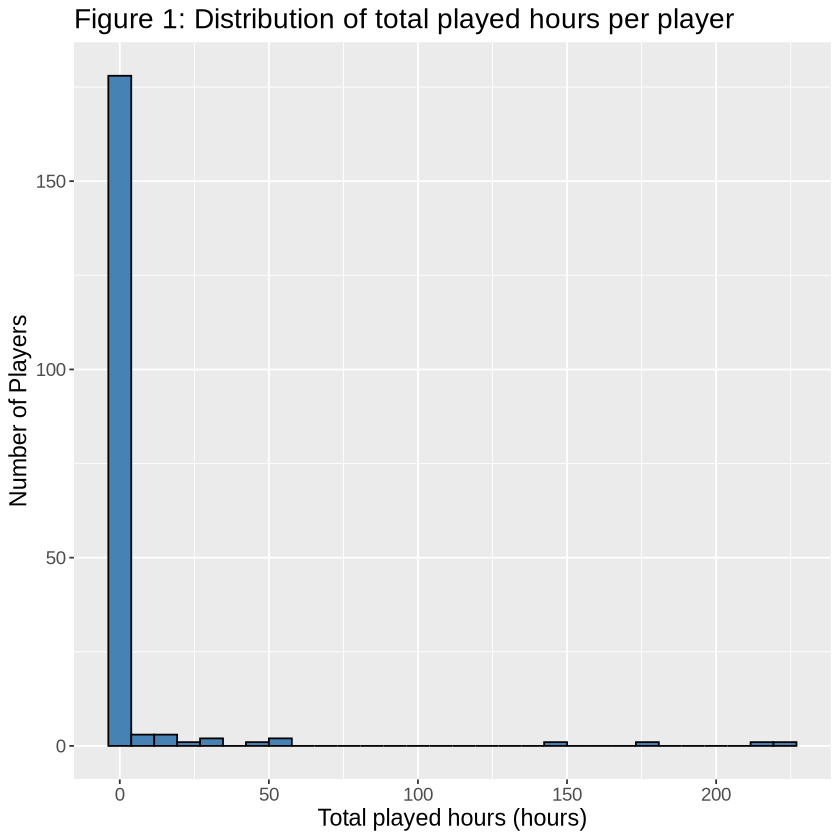

In [5]:
#Distribution of total hours played for each player
total_hours_dist_plot <- ggplot(tidy_players, aes(x = played_hours)) +
    geom_histogram(bins = 30, color = "black", fill = "steelblue") +
    labs(title = "Figure 1: Distribution of total played hours per player",
         x = "Total played hours (hours)",
         y = "Number of Players") +
    theme(text = element_text(size = 14))

total_hours_dist_plot

From figure 1, played_hours is highly skewed to the right - there is a large disparity between the number of casual and regular players.
This imbalance may require oversampling if modeling is going to be done on player features.

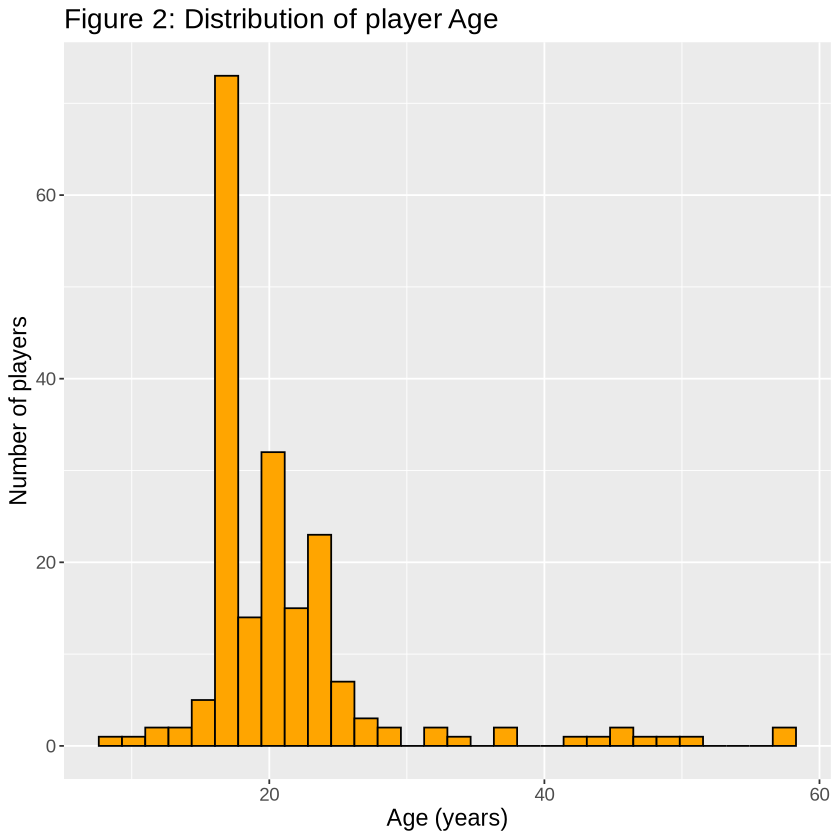

In [6]:
#Distribution of age 
age_dist_plot <- ggplot(tidy_players, aes(x = Age)) +
    geom_histogram(bins = 30, color = "black", fill = "orange") +
    labs(title = "Figure 2: Distribution of player Age",
         x = "Age (years)",
         y = "Number of players") +
    theme(text = element_text(size = 14))

age_dist_plot

Seen in figure 2, the distribution of age seems to be concentrated in the late teens/early twenties. This demographic composition may explain time of day patterns with highest traffic on server (students vs employed adults).

In [7]:
sessions <- sessions |>
  mutate(
      duration_ms = original_end_time - original_start_time,
      duration_min = round(duration_ms / 1000 / 60, 2))

tidy_sessions <- sessions |> #players.csv without the two observations with N/A values for end times,
                             #and remove sessions with negative durations
    filter(!is.na(end_time),
          end_time >= start_time)

**Tidying sessions dataset** - After removing the two observations with N/A values for end times, and removing sessions with negative durations, we can now explore initial visualisations to provide further understanding on per-player contributions to sessions and what times players are most likely to play.

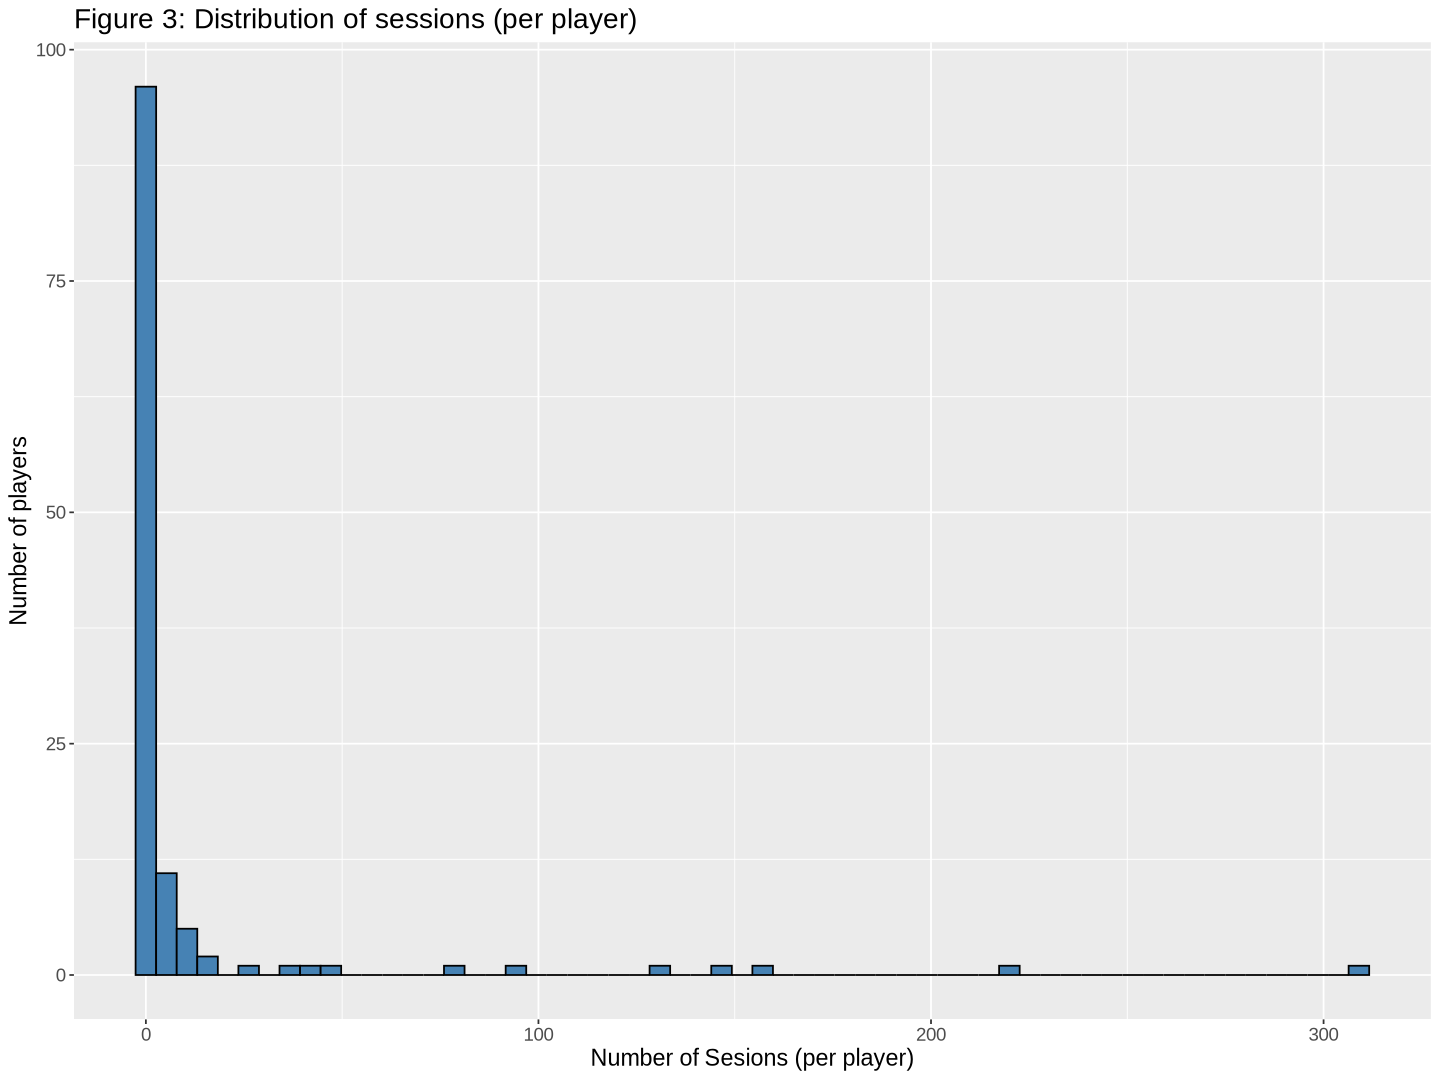

In [9]:
# Sessions per player
options(repr.plot.width = 12, repr.plot.height = 9)

summary_email_sessions <- sessions |>
    group_by(hashedEmail) |>
    summarize(count = n()) |> #how often a player re entered and played the game 
    arrange(-count)

sessions_per_player_dist <- ggplot(summary_email_sessions,
                                   aes(x = count)) +
                            geom_histogram(bins = 60, color = "black", fill = "steelblue") +
                            labs(title = "Figure 3: Distribution of sessions (per player)",
                                 x = "Number of Sesions (per player)",
                                 y = "Number of players") +
                            theme(text = element_text(size = 14))

sessions_per_player_dist

As depicted in figure 3, most players have <10 sessions with only a minority having more than this. This may cause a high variance when aggregating per-player contributions to the sessions due to uneven player engagement. 

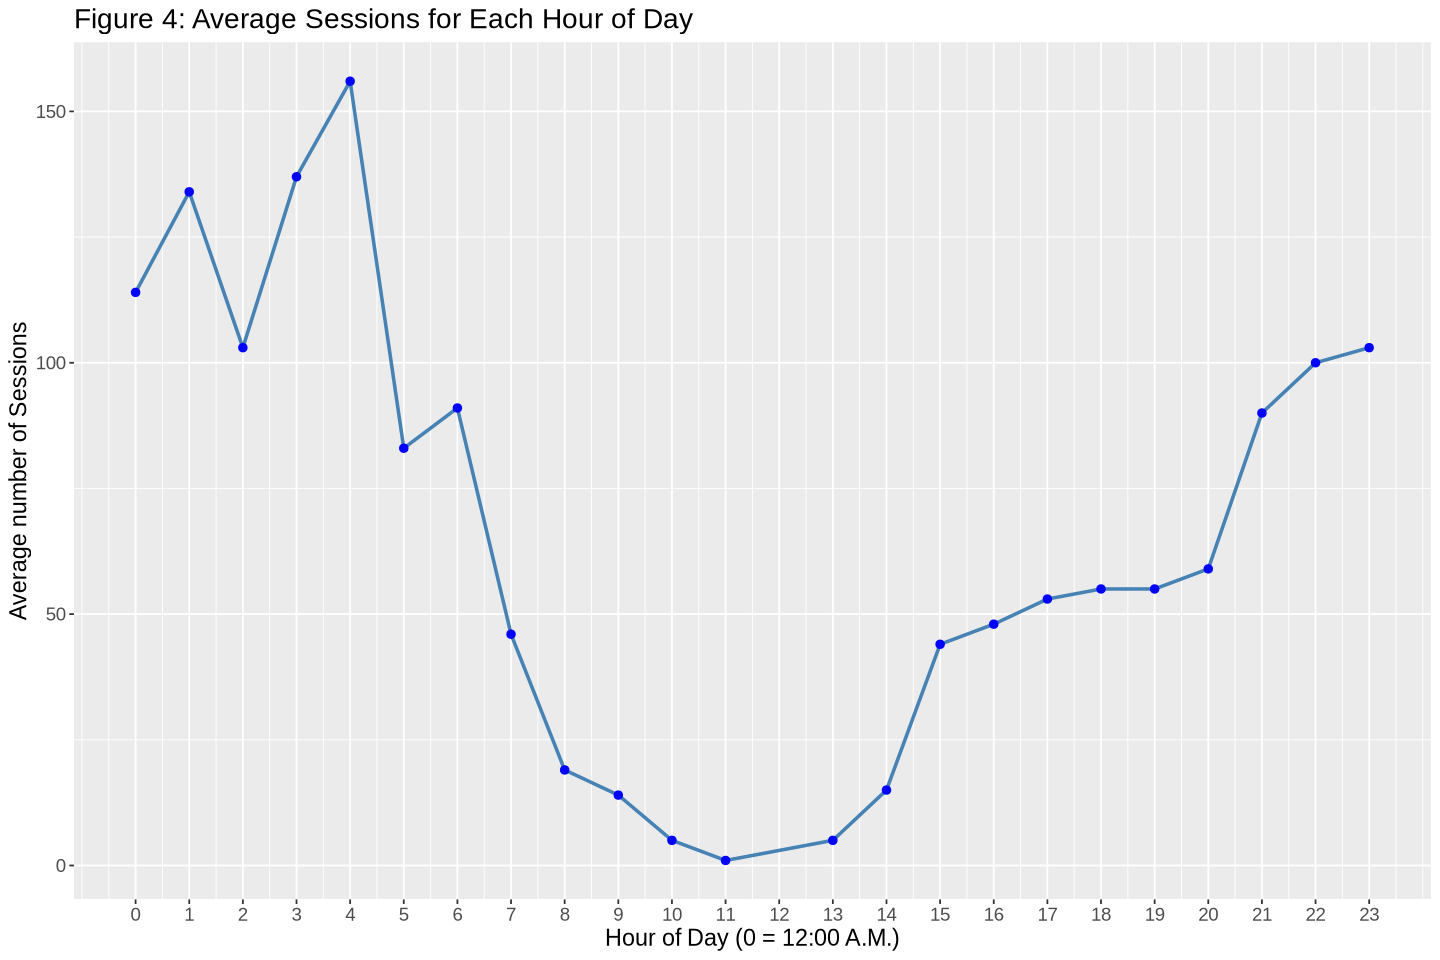

In [17]:
#Average sessions for each hour of day
options(repr.plot.width = 12, repr.plot.height = 8)

tidy_sessions <- tidy_sessions |>
    mutate(hour_of_day = floor((original_start_time / 1000 / 60 / 60) %% 24))

hourly_activity <- tidy_sessions |>
    group_by(hour_of_day) |>
    summarise(mean_sessions = n())

session_hour_plot <- hourly_activity |>
    ggplot(aes(x = hour_of_day, y = mean_sessions)) +
    geom_line(color = "steelblue", linewidth = 1) +
    geom_point(color = "blue", size = 2) +
    scale_x_continuous(breaks = 0:23) + #to represent each hour in the day
    labs(title = "Figure 4: Average Sessions for Each Hour of Day",
         x = "Hour of Day (0 = 12:00 A.M.)",
         y = "Average number of Sessions") +
    theme(text = element_text(size = 14))

session_hour_plot

To extract the hour of day, we converted the time to hours by taking the original_start_time in milliseconds and converting to hours the time to hours and dividing by 24, getting the remainder, and rounding it down.

From figure 4, we can see there is much lower activity during approximately 8 A.M. - 12 P.M. However there is a sharp rise in traffic in the afternoon and evening hours, peaking around 4 A.M ~ (> 150 sessions active) before declining as morning arrives. Such patterns can help predict high-load windows and inform when more licenses may be needed.

## Wrangling the Data ##

We'll now follow the plan for wrangling the data established above in the question section, by first joining the two tidied datasets together via hashedEmail since we already converted the timestamp into the correct format.

In [10]:
# joining the two dataframes by hashedEmail
sessions_players_joined <- tidy_players |>
  left_join(tidy_sessions, by = "hashedEmail")


# remove empty strings and NAs from timestamps
clean_joined <- sessions_players_joined |>
  filter(!is.na(start_time),
         !is.na(end_time))


# extracting the hour that the session started, by taking the substring of start time
# up to where the hours stop.
clean_joined <- clean_joined |>
  mutate(hour_start = paste0(substr(start_time, 1, 13), ":00:00"))

# extracting only the hour
clean_joined <- clean_joined |>
  mutate(hour_of_day = as.numeric(substr(start_time, 12, 13)))

# extract weekday
#interpreting day of week - https://stackoverflow.com/questions/58528619/converting-dttm-to-date-formatting-with-as-date-and-as-date-give-different-r and https://www.youtube.com/watch?v=IXtkK4JDn28
clean_joined <- clean_joined |>
  mutate(date = substr(start_time, 1, 10),
         convert_date = as.Date(date),
         week_day  = weekdays(convert_date)) |>
  filter(!is.na(convert_date)) |>
  select(-date, -convert_date)



# Flagging experiences - https://www.youtube.com/watch?v=V2T488ogxBA
clean_joined <- clean_joined |>
  mutate(experience_flag = case_when(
         experience == "Pro" ~ 1,
         experience == "Experienced" ~ 1,
         experience == "Veteran" ~ 1,
         experience == "Expert" ~ 1,
         TRUE ~ 0))


final_df <- clean_joined |>
  group_by(hour_start) |>
  reframe(
    concurrent_players = n_distinct(hashedEmail),
    avg_played_hours   = mean(played_hours, na.rm = TRUE),
    avg_age            = mean(Age, na.rm = TRUE),
    avg_skill_level    = mean(experience_flag, na.rm = TRUE),
    hour_of_day,
    week_day
  )

final_df <- final_df |>
  mutate(week_day = as_factor(week_day)) |>
  mutate(week_day = fct_recode(week_day,  "1" = "Sunday" , "2" = "Monday", "3" = "Tuesday", "4" = "Wednesday", "5" = "Thursday", "6" = "Friday", "7" = "Saturday"))

head(final_df)

hour_start          concurrent_players avg_played_hours avg_age
1 01/05/2024 00:00:00 1                    1.4            25     
2 01/05/2024 02:00:00 1                  223.1            17     
3 01/05/2024 02:00:00 1                  223.1            17     
4 01/05/2024 03:00:00 1                   32.0            22     
5 01/05/2024 04:00:00 1                    3.8            17     
6 01/05/2024 05:00:00 1                  150.0            16     
  avg_skill_level hour_of_day week_day
1 1               0           1       
2 0               2           1       
3 0               2           1       
4 0               3           1       
5 1               4           1       
6 0               5           1

From above, we filtered out missing timestamps, and extracted key temporal features such as hour of day and weekday, leveraging as.Date() (Statistics Globe, 2022). 

We then created an experience flag, assigning anything above pro in terms of skill level as 1 and anything below as 0 (Equitable Equations, 2023). We also group sessions by their start hour, and summarise concurrent players and average player characteristics. Lastly, we recode weekdays into as factor levels to produce a clean dataset (final_df) ready for modelling.

## Performing Data Analysis ##

Multivariable linear regression (MLR) will now be used to model the relationship between the number of concurrent players and predictors including: player metrics and time-based features. This approach helps capture how factors: time of day, day of week, and recent activity trends influence server load.

#### Data Analysis plan ####
1. Splitting data into training and testing subsets (80/20).
2. Fit a ggpairs plot to see the relationship between each predictor and choose the final set of predictors for regression.
3. Fit the regression model on the training set and predict on the testing set.
4. Collect metrics (rmse) and obtain coefficients

We will split the dataset (80/20) and create our appropriate workflow with the model and recipe. After that we will plot a ggpairs plot to explore the relationship between the predictors, check for possible correlations, and inspect variable distributions before actually plotting and choosing what predictors to use for the multivariable linear regression. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


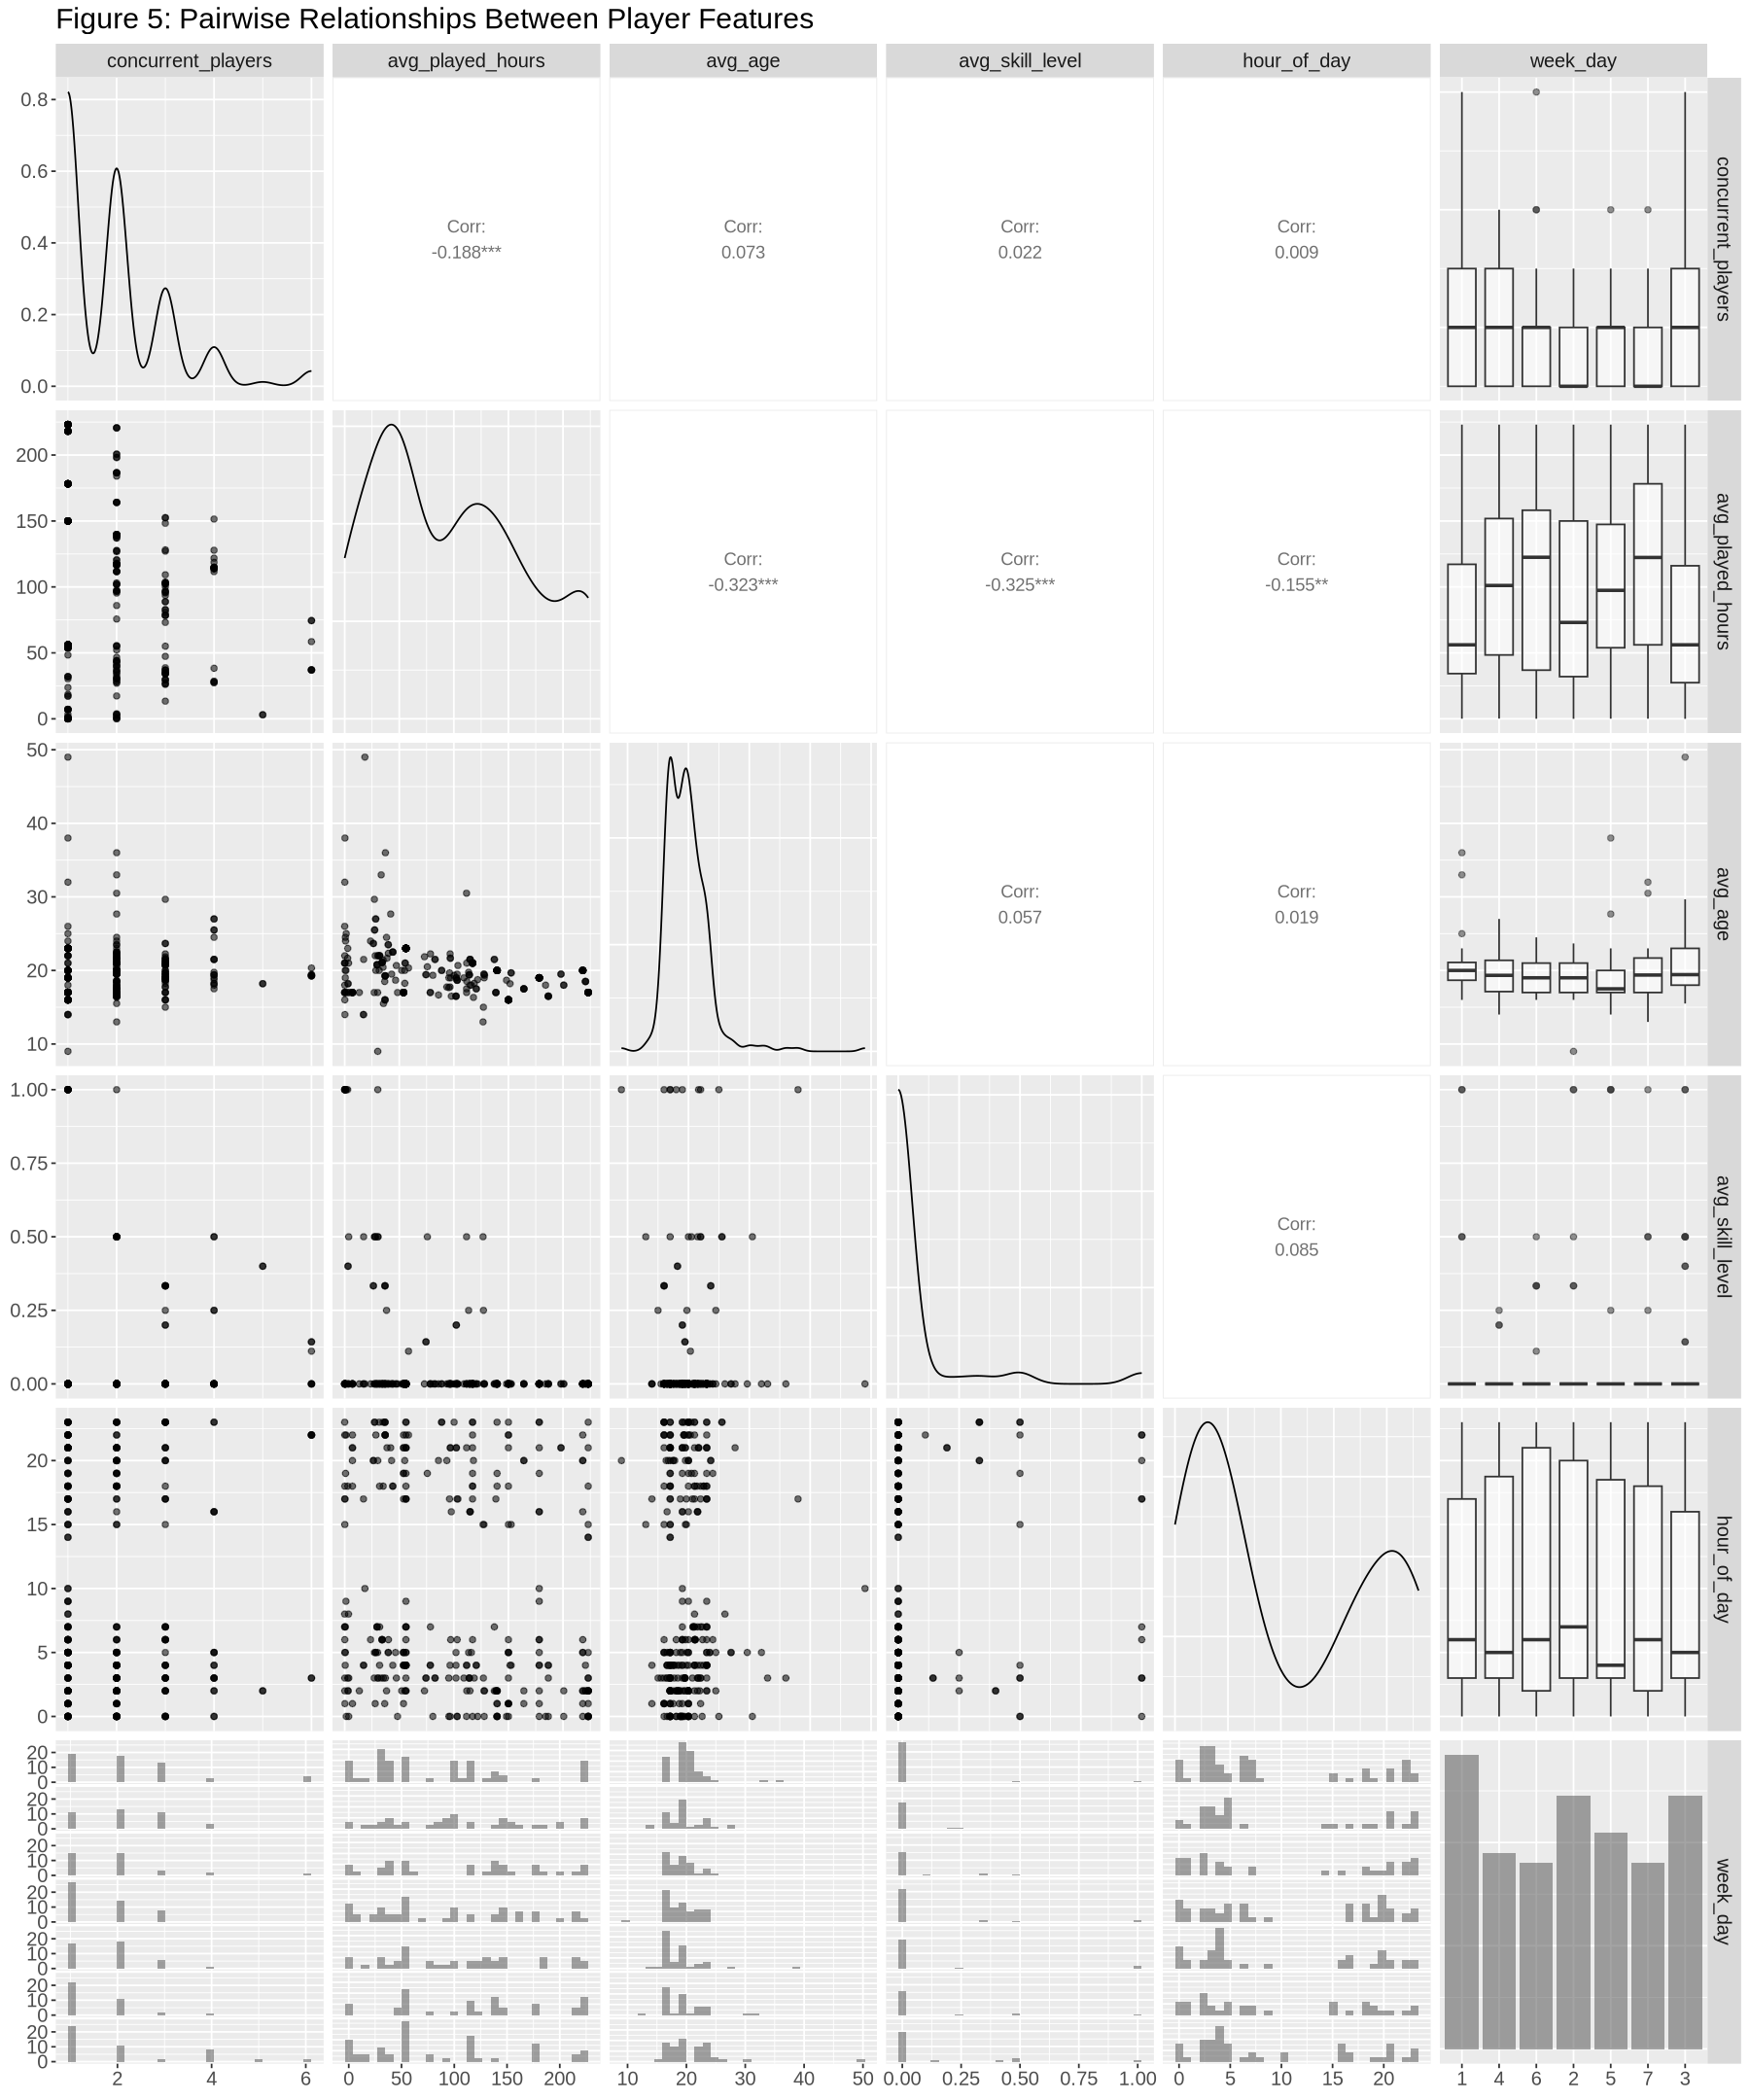

In [14]:
set.seed(123)

plaicraft_split <- initial_split(final_df, prop = 0.8, strata = concurrent_players)
plaicraft_train <- training(plaicraft_split)
plaicraft_test <- testing(plaicraft_split)

plaicraft_recipe <- recipe(concurrent_players ~ avg_played_hours + avg_age + avg_skill_level + hour_of_day + week_day, data = plaicraft_train)

plaicraft_spec <- linear_reg() |>
    set_engine("lm") |>
    set_mode("regression")

plaicraft_fit <- workflow() |>
    add_recipe(plaicraft_recipe) |>
    add_model(plaicraft_spec) |>
    fit(data = plaicraft_train)

options(repr.plot.width = 15, repr.plot.height = 18)

plaicraft_without_hour <- plaicraft_test |>
    ungroup() |>
    select(-hour_start) 

plaicraft_pairplot <- plaicraft_without_hour |>
    ggpairs(mapping = aes(alpha = 0.4)) +
    ggtitle("Figure 5: Pairwise Relationships Between Player Features") +
    theme(text = element_text(size = 15))
    
plaicraft_pairplot

Based on figure 5, none of the predictors seem to exhibit strong linear relationships with each other or with the response variable, with the highest correlation value being around 0.3. Average age, experience level, and hours played demonstrated low values (<0.5) for coorelation meaning risks of multicollinearity is very low, thus it is okay to keep all predictors for the MLR. 

After plotting the MLR we will then extract the metrics and the coefficients and arrange the coefficients in descending order to see which one's had the most impact on predicting the number of concurrent players.

In [15]:
plaicraft_mult_results <- plaicraft_fit |>
  predict(plaicraft_test) |>
  bind_cols(plaicraft_test) 

plaicraft_mult_metrics <- plaicraft_mult_results |>
    metrics(truth = concurrent_players, estimate = .pred)

plaicraft_mult_metrics

coeffs <- plaicraft_fit |>
             extract_fit_parsnip() |>
             tidy() |>
             arrange(-estimate)

coeffs

.metric .estimator .estimate 
1 rmse    standard   1.07193686
2 rsq     standard   0.07649789
3 mae     standard   0.81346660

term             estimate     std.error    statistic  p.value     
1  (Intercept)       2.116495060 0.2174134067  9.7348875 1.296970e-21
2  avg_age           0.013933981 0.0092434572  1.5074426 1.319583e-01
3  avg_played_hours -0.002312282 0.0004884992 -4.7334397 2.467793e-06
4  hour_of_day      -0.004979173 0.0036211785 -1.3750146 1.693815e-01
5  week_day4        -0.046734552 0.1160594640 -0.4026777 6.872565e-01
6  avg_skill_level  -0.071644273 0.1723065263 -0.4157955 6.776334e-01
7  week_day3        -0.079940597 0.1098457813 -0.7277530 4.669056e-01
8  week_day5        -0.299703476 0.1078611164 -2.7786054 5.543717e-03
9  week_day6        -0.303244607 0.1120984572 -2.7051631 6.922939e-03
10 week_day2        -0.336751433 0.1081150548 -3.1147506 1.884267e-03
11 week_day7        -0.365040558 0.1143002874 -3.1936976 1.440852e-03

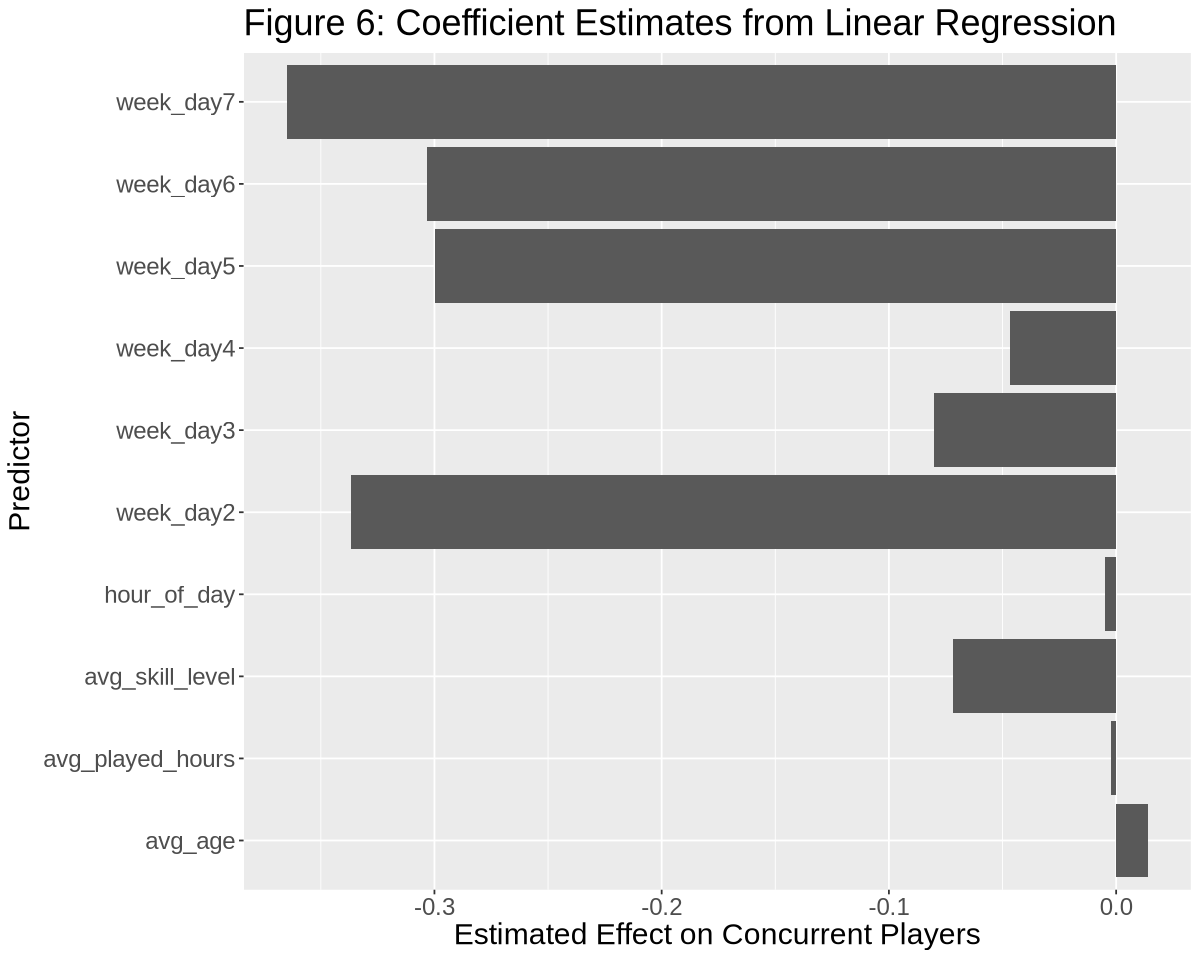

In [16]:
options(repr.plot.width = 10, repr.plot.height = 8)

coeffs_plot_df <- coeffs |>
    filter(term != "(Intercept)")

coeffs_plot <- coeffs_plot_df |>
    ggplot(aes(x = estimate, y = term)) +
    geom_bar(stat = "identity") +
     labs(title = "Figure 6: Coefficient Estimates from Linear Regression",
         y = "Predictor",
         x = "Estimated Effect on Concurrent Players") +
    theme(text = element_text(size = 18))

coeffs_plot

From figure 6, we can see that the only positive coefficient is average age, with the rest of the predictors being negative. This suggests how the predictors with small negative cooefficients are associated with slight decreases in expected concurrent player counts.

# Discussions #

The final equation from the multivariable linear regression, rounded to 3 significant figures is:
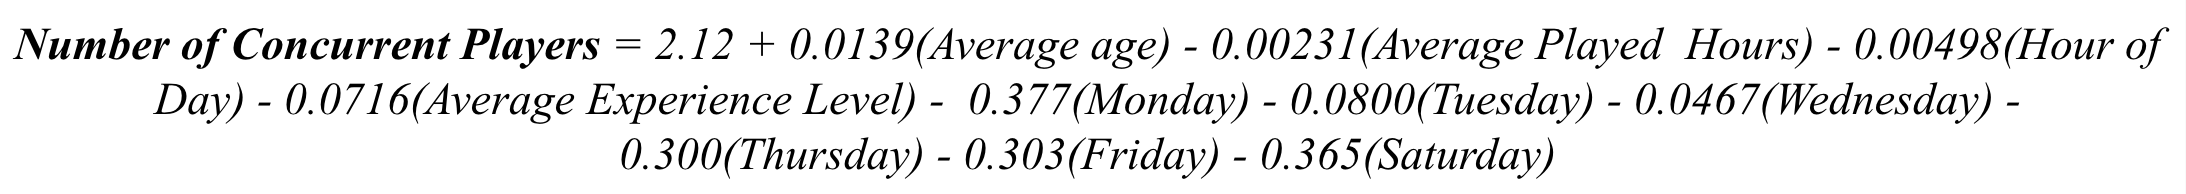

**Note:** Sunday is not included because it serves as the reference base-line category for the weekday predictor.

### Summary of Findings ###

This project explored whether features of time and aggregated player characteristics could predict the number of concurrent players on the PLAI Minecraft research server. Across the two datasets given, we first identified multiple descriptive patterns in player behaviour and demographics. The majority of players were found to be young, with a median age of 19, and most identified as beginners/amateurs or regulars, with only a small fraction viewing themselves as experts or veterans. Total playtime per player was heavily skewed, with the majority of players logging fewer than 6 hours, and only a few extreme outliers exceeding 200 hours - thus indicating a community largely composed of casual participants with a small minority of heavy players.

Session data also revealed substantial irregularities, many players had no sessions recorded at all, therefore implying that they registered but never logged in. This inactivity was further backed up with recorded session lengths often being zero minutes. Despite this, the timestamp data allowed us to identify when players would play simultaneously in the same hourly window, allowing us to construct a measure of concurrent activity.

Using these transformed and tidied datasets, we built a multivariable linear regression model using predictors such as: average age, average hours played, average skill level (after encoding to levels), hour of day (0-23), and the days in a week. The resulting model produced an **R^2 of 0.076**, meaning only 7.6% of the variation in concurrent layers could be explained by the predictors. The **RMSE of 1.07** also suggests that predictions were typically off by roughly one player. This aligns with the fact that most hours had between 1 and 6 players online, leaving limited variation for the model to capture. However, considering this RMSE value on this scale, it would be appropriate to say that 1.07 is relatively large since the response variable had a range of only 1-6, meaning if true concurrency was 2 players and the model predicts 3, this is a 50% error. Thus, this model can be concluded to have a weak predictive accuracy as backed up by the value of R^2 as well.

Figure 6 demonstrated that most coefficients were small and negative, with average being the only positive predictor. The weekday coefficients had the largest magnitude - with all being negative relative to Sunday, therefore, since Sunday is the reference level, this meant Sunday had the highest activity overall with all the other days seeing fewer players online, especially on monday and saturday as they had the largest negative magnitude. Other predictors like experience level, played hours, and hour of day had only very small negative effects.

In summary, these findings indicate that concurrency on this server is low, stable, and not strongly driven by aggregated features mentioned in the model.

### Were These Results Expected?

Yes, these results largely consisted with expectations formed during the exploratory phase. Figure 5 portrayed the correlations between predictors and response variables were extremely low. With such weak relationships, the linear model was unlikely to identify strong predictive effects. Furthermore, the narrow range of the response variable being 1-6 players per hours, leaves very little variation possible for the predictors to explain. Even if meaningful behavioural patterns existed, they are effectively masked due to the sparsity and stability of user activity in this dataset. As a result, a low R^2 and small coefficients were not surprising.

The negative weekday coefficients were also anticipated once Sunday was established as the baseline. As, if Sunday is the busiest day, it would then be natural that the model assigns lower predicted concurrency to all of the other days. The small positive coefficient for average age was slightly unexpected, as aforementioned above, the median age was 19, but a positive coefficient would signify that older players tended to have longer or more consistent play habits. However, it should be taken into consideration that the magnitude of this coefficient (0.0139) is extremely small, and so its effect may be the strongest. A negative coefficient for hour of day also corresponds with figure 4, where we see peak activity to be during the early hours of the day, coinciding the with the negative coefficient - meaning the number of concurrent players are higher during the earlier parts of day. In addition, the average experience level being negative would indicate that beginners, amateurs, and regulars were more likely to play in peak hour activities, with 'higher skilled' players logging sessions during times with less total players online. Again, the reliability of this statement may be low due to the magnitude of the coefficient being small.

### Impact of Findings ###

The low predictive power of the model indicates that hour-to-hour forecasting of player concurrency is not reliable using the current set of variables, as these factors do not provide enough information to meaningfully anticipate fluctuations in server load. Thus, decisions related to license allocation or resource planning should not rely solely on these predictors. However, the findings also reveal that concurrency is consistently low, rarely exceeding six players. This stability reduces the risk of overload, suggesting a static resource allocation strategy, like maintaining a capacity of 10 simultaneous players may be sufficient for nearly all situations - simplifying operational planning.

The demographic findings also provide insight to the recruitment implications, how although the servers attracted high curiosity (signing up), there's actually low engagement from players. Lastly, weekday effects highlight the server is busiest on Sundays, thus researchers may wish to avoid maintenance windows then, allocate more licenses during this time, or conduct experiments requiring higher traffic during this time.


### Future Questions ###
This investigation raised several questions including:
1. What unmeasured factors actually influence concurrency in players?
2. Could non-linear or time-series models perform better?
3. Would in-game behavioural-level features (i.e. number of blocks placed, distance travelled) improve accuracy?
4. How can PLAI encourage higher engagement among registered players?

# References #
* Equitable Equations [@EquitableEquations]. (2023). Mutating data frames with case_when [Video]. Youtube. https://www.youtube.com/watch?v=gkk8Zke3qpM

* Statistics Globe [@StatisticsGlobe]. (2022). Convert Date to Day of Week in R (3 Examples) | How to find the Weekday | strftime() & as.POSIXlt() [Video]. Youtube. https://www.youtube.com/watch?v=IXtkK4JDn28
